<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [ ]:
# Some constants
x_s = sp.symbols('x')
eps = np.finfo(float).eps

def get_h(n):
  return 2 / 2 ** (n)


n_arr = np.arange(1, 21)
h_arr = get_h(n_arr)

In [ ]:
def err_1(f, x, h):
  return sp.diff(f, x_s, 2).subs(x_s, x).doit() * h  / 2 + 2 * eps / h

def err_2(f, x, h):
  return 2 * eps / h - sp.diff(f, x_s, 2).subs(x_s, x).doit() * h / 2

def err_3(f, x, h):
  return eps / h + sp.diff(f, x_s, 3).subs(x_s, x) * h * h / 6

def err_4(f, x, h):
  delta_round =  4 / 3 * eps / h + 1 / 3 * eps / (2 * h)
  meth_delta = - sp.diff(f, x_s, 5).subs(x_s, x) * h * h * h * h / 30 
  return delta_round + meth_delta

def err_5(f, x, h):
  delta_round =  1.5 * eps / h + 0.6 * eps / (2 * h) + 0.1 * eps / (3 * h)
  meth_delta = sp.diff(f, x_s, 7).subs(x_s, x) * h * h * h * h * h * h / 140 
  return delta_round + meth_delta

# 4
$$
  \frac{4}{3} \frac{f(x + h) - f(x  - h)}{2h}
  - \frac{1}{3} \frac{f(x + 2h) - f(x  - 2h)}{4h} = 
  \frac{4}{3} \left( f'(x) + f^{(5)}(x) \cdot h^4 / 120 \right) - 
  \frac{1}{3} \left( f'(x) + f^{(5)}(x) \cdot 16h^4 / 120 \right) \Rightarrow
  $$$$
  \Delta_{m} = f^{(5)}(x) \cdot \frac{h^4}{3\cdot 120} \left(4-16 \right) = 
  -f^{(5)}(x) \cdot \frac{h^4}{30} 
$$


# 5
$$
  \frac{3}{2} \frac{f(x + h) - f(x  - h)}{2h}
  - \frac{3}{5} \frac{f(x + 2h) - f(x  - 2h)}{4h}+ 
   \frac{1}{10} \frac{f(x + 3h) - f(x  - 3h)}{6h} = 
  \frac{3}{2} \left( f'(x) + f^{(7)}(x) \cdot \frac{h^6}{5040} \right) - 
  \frac{3}{5} \left( f'(x) + f^{(7)}(x) \cdot 64\frac{h^6}{5040} \right) +
  \frac{1}{10} \left( f'(x) + f^{(7)}(x) \cdot 729\frac{h^6}{5040} \right) 
   \Rightarrow
  $$$$
  \Delta_{m} = f^{(7)}(x) \cdot \frac{h^6}{10 \cdot 5040} 
  \left(15 -  384 +729\right) = 
  f^{(7)}(x) \cdot \frac{h^6}{140}  
$$

In [ ]:
funcs_list = [
  sp.sin(x_s ** 2),
  sp.cos(sp.sin(x_s)),
  sp.exp(sp.sin(sp.cos(x_s))),
  sp.log(x_s + 3),
  (x_s + 3) ** 0.5
]

In [ ]:
class Method:
  # func : func(x)
  # err : err(f, x, h)
  def __init__(self, err):
    self.__err = err

  def apply(self, f, x, h):
    return self.__err(f, x, h)
  
  def plot(self, f, x):
    apply_x = lambda h: self.apply(f, x, h)

    delta_arr = abs(apply_x(h_arr))
    plt.plot(np.log2(h_arr), np.log2(delta_arr.astype(float)))

In [ ]:
def run_method(err_func, x = np.pi / 4):
  meth = Method(err_func) 
  for f in funcs_list:
    meth.plot(f, x)
    #plt.show()

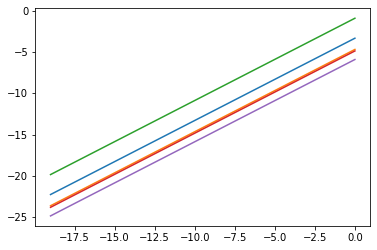

In [ ]:
run_method(err_1)

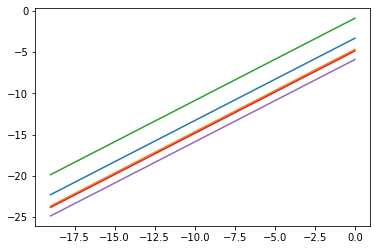

In [ ]:
run_method(err_2)

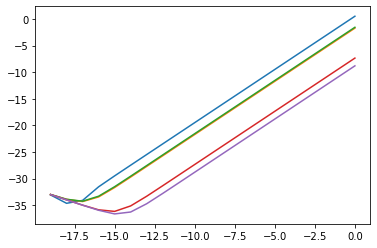

In [ ]:
run_method(err_3)

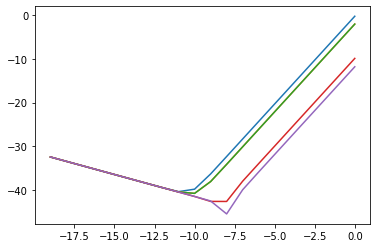

In [ ]:
run_method(err_4)

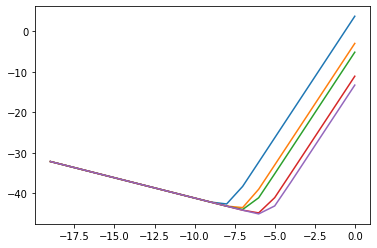

In [ ]:
run_method(err_5)